In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [3]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])

In [5]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [7]:
company['Sales'].mean()

7.496325000000001

In [8]:
company['Sales']=np.where(company.Sales < 7.49,"small","large")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,large,138,73,11,276,120,0,42,17,1,1
1,large,111,48,16,260,83,1,65,10,1,1
2,large,113,35,10,269,80,2,59,12,1,1
3,small,117,100,4,466,97,2,55,14,1,1
4,small,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,large,138,108,17,203,128,1,33,14,1,1
396,small,139,23,3,37,120,2,55,11,0,1
397,small,162,26,12,368,159,2,40,18,1,1
398,small,100,79,7,284,95,0,50,12,1,1


In [9]:
x=company.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [10]:
y=company.Sales
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: Sales, Length: 400, dtype: object

In [15]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [16]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

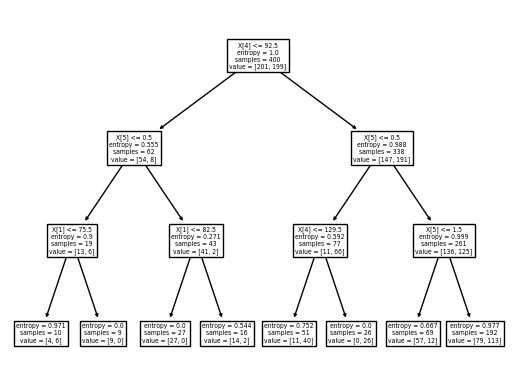

In [17]:
tree.plot_tree(model);

In [18]:
model.feature_importances_

array([0.        , 0.09451424, 0.        , 0.        , 0.3552698 ,
       0.55021597, 0.        , 0.        , 0.        , 0.        ])

In [19]:
fi=pd.DataFrame({'feature':list(x_train.columns),
                'importance':model.feature_importances_}).\
                 sort_values('importance',ascending=False)

In [20]:
fi

,feature,importance
5,ShelveLoc,0.550216
4,Price,0.355270
1,Income,0.094514
0,CompPrice,0.000000
2,Advertising,0.000000
3,Population,0.000000
6,Age,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


In [22]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [23]:
model_gini.feature_importances_

array([0.        , 0.05840026, 0.03097676, 0.        , 0.36776956,
       0.45028089, 0.09257254, 0.        , 0.        , 0.        ])

In [24]:
fi=pd.DataFrame({'feature':list(x_train.columns),
                'importance':model_gini.feature_importances_}).\
                    sort_values('importance',ascending=False)

In [25]:
fi

,feature,importance
5,ShelveLoc,0.450281
4,Price,0.367770
6,Age,0.092573
1,Income,0.058400
2,Advertising,0.030977
0,CompPrice,0.000000
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


Shelvloc is important feature for company sales